In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance

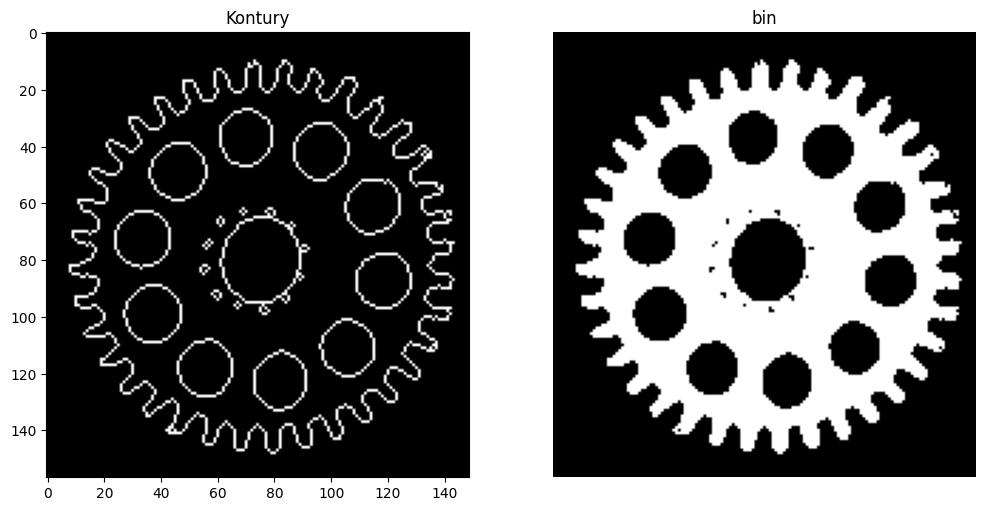

In [28]:
img = cv2.imread('trybik.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

bin_img = cv2.threshold(cv2.bitwise_not(img), 80, 255, 0)[1]
# cv2.imshow('bin', bin_img)

contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

probna = np.zeros(bin_img.shape)
cv2.drawContours(probna, contours, -1, 255)

# cv2.imshow('kontury', probna)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.imshow(probna, cmap='gray')
plt.title('Kontury')

plt.subplot(1, 2, 2)
plt.imshow(bin_img, cmap='gray')
plt.title('bin')
plt.axis('off')
plt.show()


In [29]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
grad = np.sqrt(sobelx**2 + sobely**2)
grad = grad/np.amax(grad)
orient = np.arctan2(sobely, sobelx)

m = cv2.moments(bin_img, 1)
mx = m['m10']/m['m00']
my = m['m01']/m['m00']

In [30]:
Rtable = [[] for i in range(360)]

for contour in contours:
    for pts in contour:
        wektor = (mx - pts[0][0], my - pts[0][1])
#         dist = np.sqrt(wektor[0]**2 + wektor[1]**2)
        dist = distance.euclidean(pts[0], [mx, my])
#         ang = np.rad2deg(np.arctan2(wektor[1], wektor[0]))
        ang = np.arctan2(wektor[1], wektor[0])
        ptr = int(np.rad2deg(orient[pts[0, 0], pts[0, 1]]))
        Rtable[ptr].append((dist, ang))

In [31]:
img2 = cv2.imread('trybiki2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = cv2.bitwise_not(img2)

sobelx2 = cv2.Sobel(img2, cv2.CV_64F, 1, 0, ksize=5)
sobely2 = cv2.Sobel(img2, cv2.CV_64F, 0, 1, ksize=5)

grad2 = np.sqrt(sobelx2**2 + sobely2**2)
grad2 = grad2/np.amax(grad2)
orient2 = np.arctan2(sobely2, sobelx2)

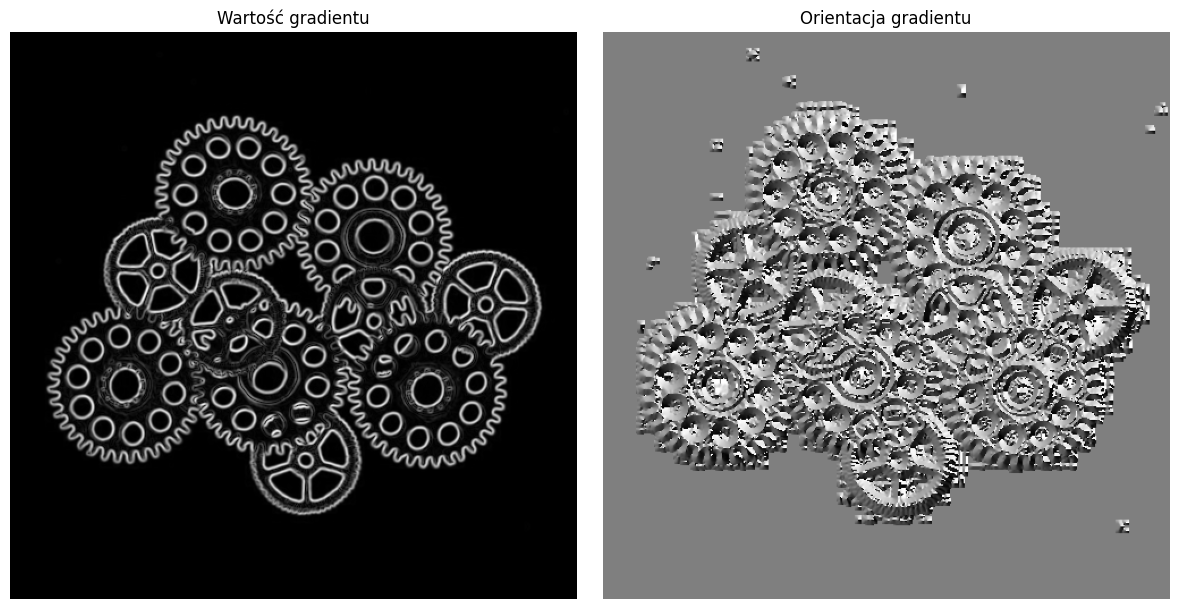

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.gray()
plt.imshow(grad2)
plt.axis('off')
plt.title('Wartość gradientu')
plt.subplot(1, 2, 2)
plt.gray()
plt.axis('off')
plt.imshow(orient2)
plt.title('Orientacja gradientu')
plt.tight_layout()
plt.show()

In [33]:
acc = np.zeros(img2.shape)
for x in range(grad2.shape[0]):
    for y in range(grad2.shape[1]):
        if grad2[x, y] > 0.5:
            for rs in Rtable[int(np.rad2deg(orient2[x][y]))]:
                r = rs[0]
                fi = rs[1]
                x1 = x - r*np.cos(fi)
                y1 = y - r*np.sin(fi)
                if x1 < acc.shape[0] and y1 < acc.shape[1]:
                    acc[int(x1)][int(y1)] += 1
                    
max_hough = np.where(acc == np.unique(acc)[-1])
a_max_hough = np.where(acc == np.unique(acc)[-2])
aa_max_hough = np.where(acc == np.unique(acc)[-3])
aaa_max_hough = np.where(acc == np.unique(acc)[-4])
aaaa_max_hough = np.where(acc == np.unique(acc)[-5])
the_max_hough = np.where(acc == np.unique(acc)[-7])

In [34]:
np.unique(acc)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       17., 18.])

In [35]:
max_hough, a_max_hough, aa_max_hough, aaa_max_hough, aaaa_max_hough

((array([314], dtype=int64), array([98], dtype=int64)),
 (array([315], dtype=int64), array([99], dtype=int64)),
 (array([314], dtype=int64), array([99], dtype=int64)),
 (array([313], dtype=int64), array([97], dtype=int64)),
 (array([141, 315], dtype=int64), array([198, 100], dtype=int64)))

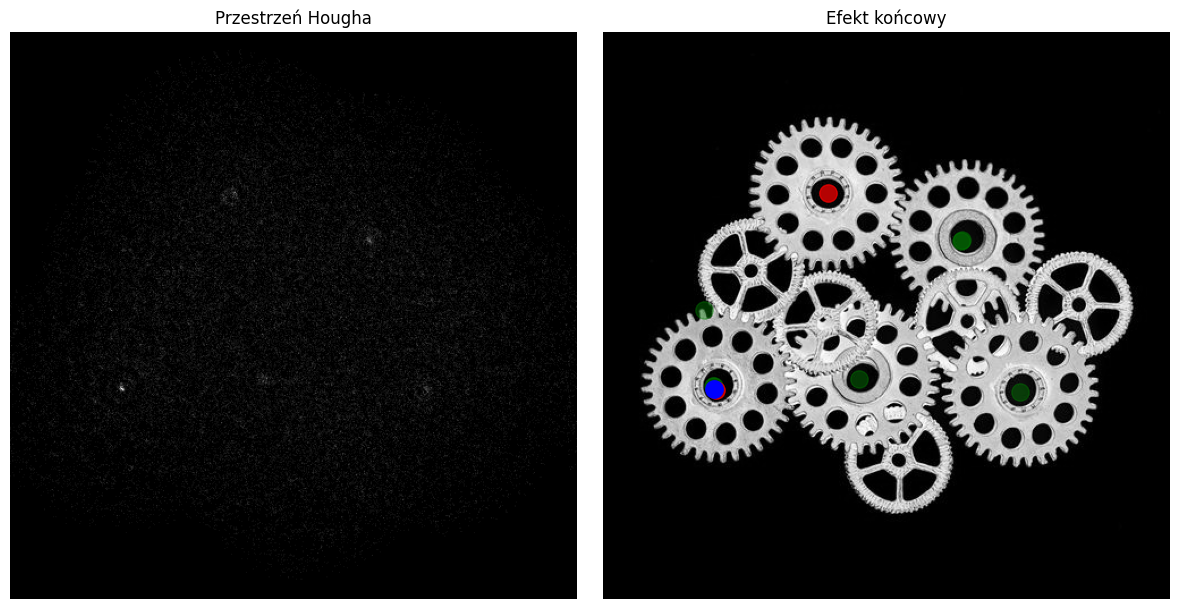

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.gray()
plt.imshow(acc*255/acc.max())
plt.title('Przestrzeń Hougha')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)

plt.plot(the_max_hough[1], the_max_hough[0], '.g', markersize=25, alpha=0.4)
plt.plot(aaaa_max_hough[1], aaaa_max_hough[0], '.r', markersize=25, alpha=0.7)
plt.plot(max_hough[1], max_hough[0], '.b', markersize=25, alpha=1)

plt.title('Efekt końcowy')
plt.axis('off')
plt.tight_layout()
plt.show()